# Visualising models with time series and phase spaces

Once we have time series &ndash; by whatever means &ndash; we can visualise them to try to understand their properties, and perhaps relate them back to the defining equations (if we have them). In this notebook we'll look at two ways to plot time series.

The first is as a straightforward plot of values against time, which focuses on the time evolution of the system: what happens to the values as time progresses? In systems of one variable this is often easy to determine (at least roughly) simply by inspection, but for systems with several variables that can't be separated therte are often features that are hard to discern without a plot.

The second approach essentially discard the time variable and instead focuses on how the variables relate to each other at the same time. The *phase space* plots all the variables simultaneously, as a point in the phase space, and the locus that this point inscribes as time progresses shows the ways in which the variables interrelate.

In [1]:
# maths
from numpy import sin, cos, pi

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

## Plotting time series

Let's begin by plotting time series of values against time. We'll assume we have equations describing two variables, and we'll further assume that these two variables form a first-order system relying only on the values at the *previous* timestep. We won't force the system to be autonomous, though, so there could be a dependency on time; nor will we force it to be linear.

We can defiune a function that takes the equations and their initial values and "pushes" the initial conditions through the equations for some number of steps.

In [2]:
def timeSeries(x, y, x0, y0, t):
    '''Create a time series of length t for two functions X and Y, starting
    from the given initial conditions. The equations are assumed to describe
    a first-order system.
    
    :param x: x(t) as a function of x(t - 1), y(t - 1), and t
    :param y: y(t) and a function of x(t - 1), y(t - 1), and t
    :param x0: initial value of x
    :param y0: initial value of y
    :param t: number of timesteps
    :returns: a pair of time series'''
    
    # initial conditions are the first elements of the time series
    xs = [ x0 ]
    ys = [ y0 ]
    
    # run through the times
    for i in range(1, t):
        xt = x(xs[-1], ys[-1], i)
        yt = y(xs[-1], ys[-1], i)
        xs.append(xt)
        ys.append(yt)
        
    return (range(t), xs, ys)

We then need some functions. Let's start with the system described by Sayama, section 4.4.

In [11]:
# (taken from Sayama, section 4.4)
def X1s(x1, y1, t):
    return 0.5 * x1 + y1

def Y1s(x1, y1, t):
    return -0.5 * x1 + y1

We then pass these functions and initial conditions to our time series generator.

In [12]:
# compute the time series from initial conditions
(t1s, x1s, y1s) = timeSeries(X1s, Y1s, 1, 1, 50)

The result is three sequences of times, x-values, and y-values. We can plot the values against the times to see how they evolve.

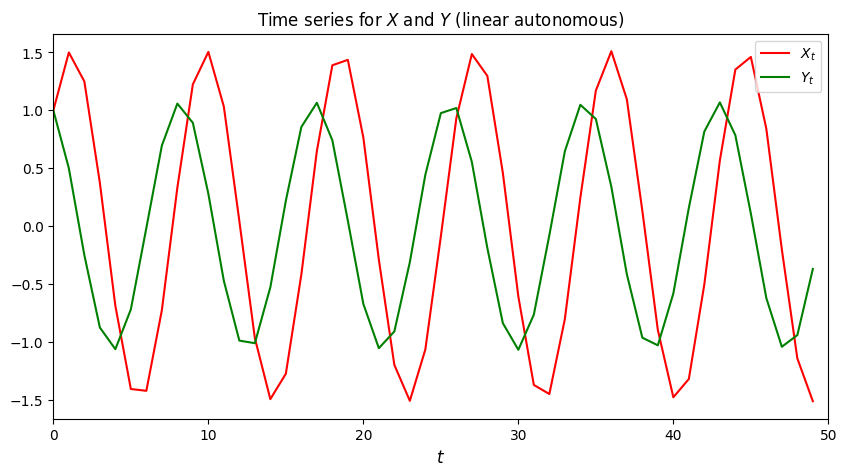

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the two time series
ax.plot(t1s, x1s, 'r-', label='$X_t$')
ax.plot(t1s, y1s, 'g-', label='$Y_t$')
    
 # set title and axis limits
ax.set_title('Time series for $X$ and $Y$ (linear autonomous)')
ax.set_xlabel('$t$')
ax.set_xlim([0, len(t1s)])
ax.legend(loc='upper right')
plt.show()

(Compare this to Sayama's figure 4.3.)

The fact that the two time series are coupled together can make for interesting interactions. Let's keep the definition of $x$ the same but cvhange that of $y$ slightly.

In [14]:
# a first-order, linear, autonomous system
def Y1a(x1, y1, t):
    return -0.85 * x1 - 0.025 * y1

In [15]:
# compute the time series from initial conditions
(t1as, x1as, y1as) = timeSeries(X1s, Y1a, 1, 1, 50)

How does the evolution in time change?

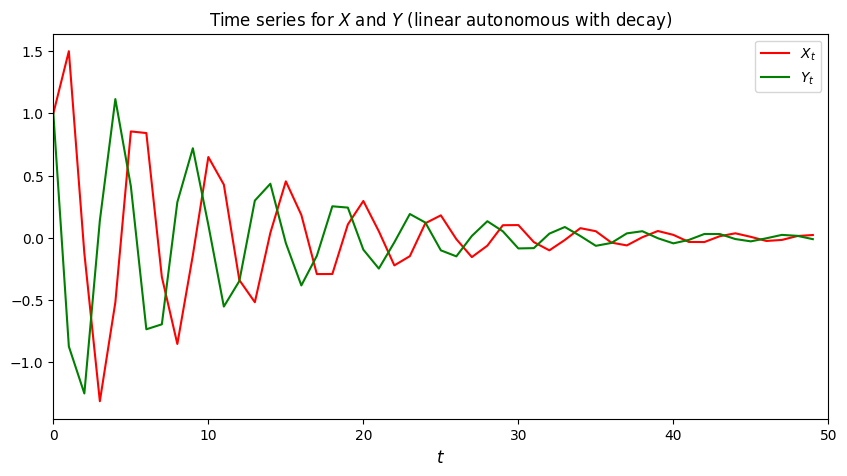

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the two time series
ax.plot(t1as, x1as, 'r-', label='$X_t$')
ax.plot(t1as, y1as, 'g-', label='$Y_t$')
    
 # set title and axis limits
ax.set_title('Time series for $X$ and $Y$ (linear autonomous with decay)')
ax.set_xlabel('$t$')
ax.set_xlim([0, len(t1as)])
ax.legend(loc='upper right')
plt.show()

Whereas the first system reached a state of stable oscillations, the second system seems to decay, despite still being a linear system &ndash; and *both* series do, despite only *one* of their definitions being changed, because the values of $x$ are coupled to those of $y$.

## Non-linear time series

How does non-linearity manifest itself? We can define another system that is still first-order, but where the values vary non-linearly with respect to their histories.

In [17]:
# a first-order, non-linear, non-autonomous system
def X1n(x1, y1, t):
    return 0.5 * x1  + y1 - (t ** 2 / 500)

def Y1n(x1, y1, t):
    return -0.85 * x1 - 0.025 * x1 * y1 - (t ** 2 / 500)

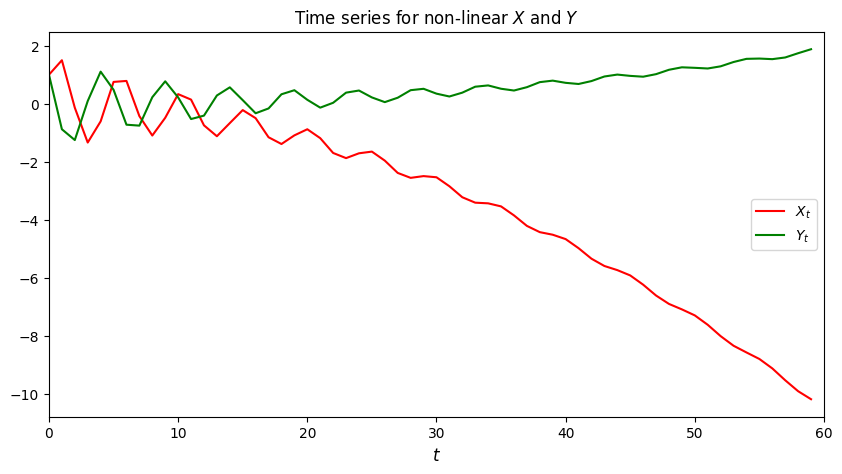

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# compute the time series
(t1ns, x1ns, y1ns) = timeSeries(X1n, Y1n, 1, 1, 60)

# plot the two time series
ax.plot(t1ns, x1ns, 'r-', label='$X_t$')
ax.plot(t1ns, y1ns, 'g-', label='$Y_t$')
    
 # set title and axis limits
ax.set_title('Time series for non-linear $X$ and $Y$')
ax.set_xlabel('$t$')
ax.set_xlim([0, len(t1ns)])
ax.legend(loc='center right')
plt.show()

We see the same oscillatory behaviour initially &ndash; but it is no longer stable, and the plots diverge after a few tens of steps.

## Plotting phase spaces

The plots against time *emphasise* time, in the sense that they focus on the end-state behaviour as time increases. A phase space plot instead shows something of the long-term behaviour of the values relative to each other, and can often highlight features that might not be clear in the time series.

Let's explore this by plotting the original system from above, but &ndash; instead of plottiong the variables against time &ndash; we'll instead plot them against each other at the *same* time. A point in the phase space represents the values of $x$ and $y$ at somew observation time, and this point moves as time increases.

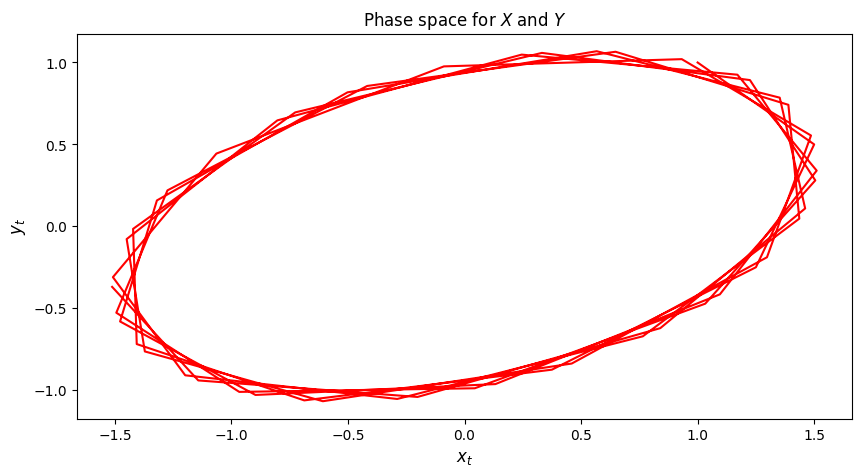

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the two time series
ax.plot(x1, y1, 'r-')
    
 # set title and axis limits
ax.set_title('Phase space for $X$ and $Y$')
ax.set_xlabel('$x_t$')
ax.set_ylabel('$y_t$')
plt.show()

We can immediately extract several features from this plot. Firstly, the values of $x$ and $y$ remain *bounded* within a small range of values. Secondly, the fact that they oscillate is indicated by the fact that the phase space portrait is eliptical: the values return to earlier values. Although the plot isn't entirely smooth, which suggests something else is going on: maybe an effect of discrete time?

Why is the plot an elipse? Or, to put the question differently, what would need to happen for the plot to be a circle? What is the significance of the fact that the elipse is "tilted" off the main $xy$ axes? &ndash; and, again,  what would cause the plot to be aligned?

Let's now look at our second system, which decayed over time.

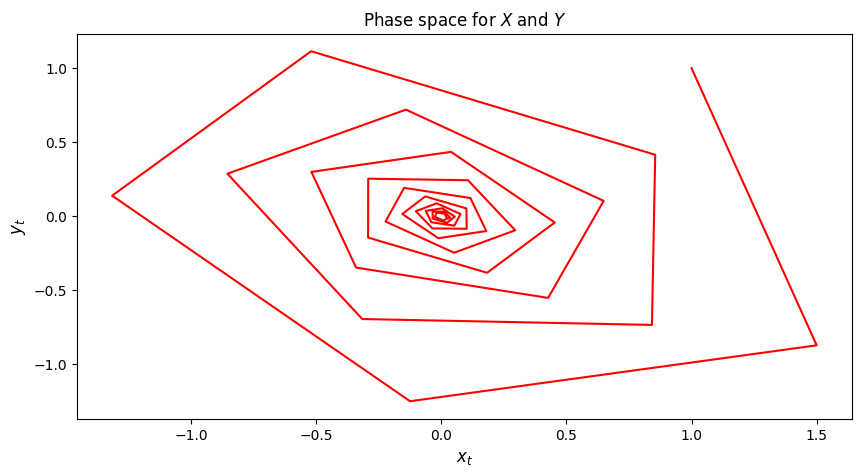

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the phase space
ax.plot(x1as, y1as, 'r-')
    
# set title and axis limits
ax.set_title('Phase space for $X$ and $Y$')
ax.set_xlabel('$x_t$')
ax.set_ylabel('$y_t$')
plt.show()

This phase space portrait is quite spread-out, adn we can see the initial conditions at $(1, 1)$ in the top right. The portrait traces an elisepo, just like the first system: but at each rotation the elipse grows smaller, tracing out a discrete spiral that eventually decays-away to nothing in a fixed point at the centre.

How can we interpret this shape? Why is "decay" in the time domain manifesting itself as a spiral in phase space?

Finally, let's plot the final non-linear system.

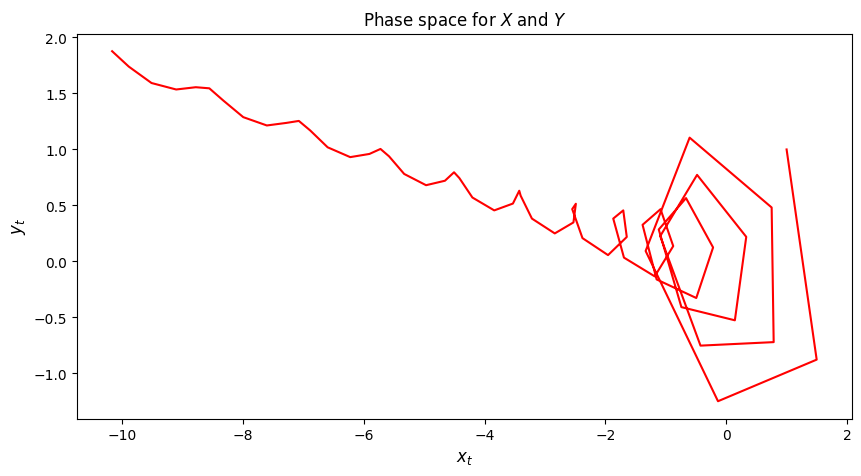

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the phase space
ax.plot(x1ns, y1ns, 'r-')
    
# set title and axis limits
ax.set_title('Phase space for $X$ and $Y$')
ax.set_xlabel('$x_t$')
ax.set_ylabel('$y_t$')
plt.show()

*Very* strange! But we can extract some information from what we already know from the time domain. There is that circular/eliptical structure again, whcih once again seems to decay &ndash; but then moves to the side, out of its previous rotations, changes structure, and seems to fly-off towards infinity at the top-left. What information can we extract from each of these features?

## Non-linear phase spaces (with clearer structure)

Perhaps we can highlight some of the equational features that affect phase space portraits &ndash; and therefore get a better handle on what we're looking at &ndash; but doing a more complicated, larger, but somewhat more familiar example.

You might be used to the idea that a circle can be described using trigonometric functions. Specifically, we can take a system

$$
x = r \, \cos \theta \\
y = r \, \sin \theta
$$

which has two variables $x$ and $y$ parameterised by an angle $\theta$ rather than a time $t$. We can turn this into a discrete system by discretising $\theta$ into (for example) 60 equal units, so that

$$
x = r \, \cos \bigg( \frac{2 \pi}{60} t \bigg) \\
y = r \, \sin \bigg( \frac{2 \pi}{60} t \bigg)
$$

so that as $t$ goes from $0$ to $60$ the angle runs from $0$ to $2 \pi$. The dsifference between two successive values of $x$ and $y$ is a constantr angle, so

\begin{align}
\Delta x_t &= r \cos \frac{2 \pi}{60} \\
\Delta y_t &= r \sin \frac{2 \pi}{60}
\end{align}




The result is an autonomous, non-linear, first-order system of two variables.

In [ ]:
r = 2

def Xcirc(x1, y1, t):
    return x1 + r * cos(2 * pi / 60)

def Ycirc(x1, y1, t):
    return y1 + r * sin(2 * pi / 60)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

# compute the time series
(tcircss, xcircs, ycircs) = timeSeries(Xcirc, Ycirc, 2, 0, 61)

# plot the phase space
ax.plot(xcircs, ycircs, 'r-')
    
# set title and axis limits
ax.set_title('Phase space for parameterised circle')
ax.set_xlabel('$x_t$')
ax.set_ylabel('$y_t$')
plt.show()

Note that this is a discrete phase space, even though it looks continuous: the samples occur close together.

Noe let's add some distortion by changing the value of